# Course Description
Kaggle is the most famous platform for Data Science competitions. Taking part in such competitions allows you to work with real-world datasets, explore various machine learning problems, compete with other participants and, finally, get invaluable hands-on experience. In this course, you will learn how to approach and structure any Data Science competition. You will be able to select the correct local validation scheme and to avoid overfitting. Moreover, you will master advanced feature engineering together with model ensembling approaches. All these techniques will be practiced on Kaggle competitions datasets.)

# CHAPTER 1
## Kaggle competitions process
In this first chapter, you will get exposure to the Kaggle competition process. You will train a model and prepare a csv file ready for submission. You will learn the difference between Public and Private test splits, and how to prevent overfitting.



# Explore train data
You will work with another Kaggle competition called "Store Item Demand Forecasting Challenge". In this competition, you are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items in 10 different stores.

To begin, let's explore the train data for this competition. For the faster performance, you will work with a subset of the train data containing only a single month history.

Your initial goal is to read the input data and take the first look at it.

In [68]:
# Import pandas
import pandas as pd

# Read train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


# Explore test data
Having looked at the train data, let's explore the test data in the "Store Item Demand Forecasting Challenge". Remember, that the test dataset generally contains one column less than the train one.

This column, together with the output format, is presented in the sample submission file. Before making any progress in the competition, you should get familiar with the expected output.

That is why, let's look at the columns of the test dataset and compare it to the train columns. Additionally, let's explore the format of the sample submission. The train DataFrame is available in your workspace.

In [69]:
import pandas as pd

# Read the test data
test = pd.read_csv('demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


# Determine a problem type
You will keep working on the Store Item Demand Forecasting Challenge. Recall that you are given a history of store-item sales data, and asked to predict 3 months of the future sales.

Before building a model, you should determine the problem type you are addressing. The goal of this exercise is to look at the distribution of the target variable, and select the correct problem type you will be building a model for.

The train DataFrame is already available in your workspace. It has the target variable column called "sales". Also, matplotlib.pyplot is already imported as plt.

Regression type of problem

# Train a simple model
As you determined, you are dealing with a regression problem. So, now you're ready to build a model for a subsequent submission. But now, instead of building the simplest Linear Regression model as in the slides, let's build an out-of-box Random Forest model.

You will use the RandomForestRegressor class from the scikit-learn library.

Your objective is to train a Random Forest model with default parameters on the "store" and "item" features.

In [70]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#view 5 rows of dataframe
print(train.head())

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


RandomForestRegressor()

# Prepare a submission
You've already built a model on the training data from the Kaggle Store Item Demand Forecasting Challenge. Now, it's time to make predictions on the test data and create a submission file in the specified format.

Your goal is to read the test data, make predictions, and save these in the format specified in the "sample_submission.csv" file. The rf object you created in the previous exercise is available in your workspace.

Note that starting from now and for the rest of the course, pandas library will be always imported for you and could be accessed as pd

In [71]:
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

# Train XGBoost models
Every Machine Learning method could potentially overfit. You will see it on this example with XGBoost. Again, you are working with the Store Item Demand Forecasting Challenge. The train DataFrame is available in your workspace.

Firstly, let's train multiple XGBoost models with different sets of hyperparameters using XGBoost's learning API. The single hyperparameter you will change is:

max_depth - maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

In [72]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'verbosity': 0}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [73]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'verbosity': 0}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [74]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'verbosity': 0}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

# Explore overfitting XGBoost
Having trained 3 XGBoost models with different maximum depths, you will now evaluate their quality. For this purpose, you will measure the quality of each model on both the train data and the test data. As you know by now, the train data is the data models have been trained on. The test data is the next month sales data that models have never seen before.

The goal of this exercise is to determine whether any of the models trained is overfitting. To measure the quality of the models you will use Mean Squared Error (MSE). It's available in sklearn.metrics as mean_squared_error() function that takes two arguments: true values and predicted values.

train and test DataFrames together with 3 models trained (xg_depth_2, xg_depth_8, xg_depth_15) are available in your workspace.

In [75]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 331.064. MSE Test: 249.522
MSE Train: 112.057. MSE Test: 30.577
MSE Train: 84.952. MSE Test: 3.516


# CHAPTER 2
## Dive into competition

Now that you know the basics of Kaggle competitions, you will learn how to study the specific problem at hand. You will practice EDA and get to establish correct local validation strategies. You will also learn about data leakage.

# Define a competition metric
Competition metric is used by Kaggle to evaluate your submissions. Moreover, you also need to measure the performance of different models on a local validation set.

For now, your goal is to manually develop a couple of competition metrics in case if they are not available in sklearn.metrics.

In particular, you will define:

Mean Squared Error (MSE) for the regression problem:
 
 

Logarithmic Loss (LogLoss) for the binary classification problem:
 
 


In [76]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 331.064. MSE Test: 249.522
MSE Train: 112.057. MSE Test: 30.577
MSE Train: 84.952. MSE Test: 3.516


In [ ]:
import numpy as np

# Import log_loss from sklearn
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
  	# Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms)   
    return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

# EDA statistics
As mentioned in the slides, you'll work with New York City taxi fare prediction data. You'll start with finding some basic statistics about the data. Then you'll move forward to plot some dependencies and generate hypotheses on them.

The train and test DataFrames are already available in your workspace.

In [77]:
import pandas as pd
train= pd.read_csv('taxi_train_chapter_4.csv')
test= pd.read_csv('taxi_test_chapter_4.csv')

# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Train head()
(train.head())

Train shape: (20000, 8)
Test shape: (9914, 7)


id  fare_amount          pickup_datetime  pickup_longitude  \
0   0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1   1         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2   2          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3   3          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4   4          5.3  2010-03-09 07:51:00 UTC        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1

In [78]:
# Describe the target variable
print(train.fare_amount.describe())

# Train distribution of passengers within rides
print(train.passenger_count.value_counts())

count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64
1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: passenger_count, dtype: int64


# EDA plots I
After generating a couple of basic statistics, it's time to come up with and validate some ideas about the data dependencies. Again, the train DataFrame from the taxi competition is already available in your workspace.

To begin with, let's make a scatterplot plotting the relationship between the fare amount and the distance of the ride. Intuitively, the longer the ride, the higher its price.

To get the distance in kilometers between two geo-coordinates, you will use Haversine distance. Its calculation is available with the haversine_distance() function defined for you. The function expects train DataFrame as input.

In [79]:
def haversine_distance(train):
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

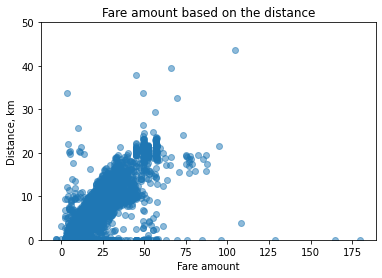

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Calculate the ride distance
train['distance_km'] = haversine_distance(train)
test['distance_km']= haversine_distance(test)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

# EDA plots II
Another idea that comes to mind is that the price of a ride could change during the day.

Your goal is to plot the median fare amount for each hour of the day as a simple line plot. The hour feature is calculated for you. Don't worry if you do not know how to work with the date features. We will explore them in the chapter on Feature Engineering.

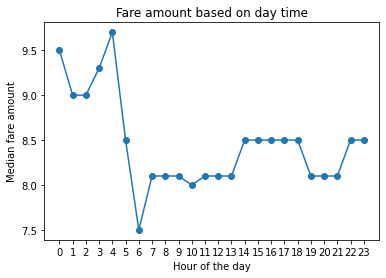

In [81]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

# prices higher at night, we should includer hours at night in the model 

# K-fold cross-validation
You will start by getting hands-on experience in the most commonly used K-fold cross-validation.

The data you'll be working with is from the "Two sigma connect: rental listing inquiries" Kaggle competition. The competition problem is a multi-class classification of the rental listings into 3 classes: low interest, medium interest and high interest. For faster performance, you will work with a subsample consisting of 1,000 observations.

You need to implement a K-fold validation strategy and look at the sizes of each fold obtained. train DataFrame is already available in your workspace.

# Stratified K-fold
As you've just noticed, you have a pretty different target variable distribution among the folds due to the random splits. It's not crucial for this particular competition, but could be an issue for the classification competitions with the highly imbalanced target variable.

To overcome this, let's implement the stratified K-fold strategy with the stratification on the target variable. train DataFrame is already available in your workspace.

In [ ]:
# Import KFold
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in kf.split(train):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

In [82]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in str_kf.split(train, train['interest_level']):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1


# Time K-fold
Remember the "Store Item Demand Forecasting Challenge" where you are given store-item sales data, and have to predict future sales?

It's a competition with time series data. So, time K-fold cross-validation should be applied. Your goal is to create this cross-validation strategy and make sure that it works as expected.

Note that the train DataFrame is already available in your workspace, and that TimeSeriesSplit has been imported from sklearn.model_selection.

In [83]:
train= pd.read_csv('demand_forecasting_train_1_month.csv')
test= pd.read_csv('demand_forecasting_test.csv')
from sklearn.model_selection import TimeSeriesSplit

# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

Fold : 0
Train date range: from 2017-12-01 to 2017-12-08
Test date range: from 2017-12-08 to 2017-12-16

Fold : 1
Train date range: from 2017-12-01 to 2017-12-16
Test date range: from 2017-12-16 to 2017-12-24

Fold : 2
Train date range: from 2017-12-01 to 2017-12-24
Test date range: from 2017-12-24 to 2017-12-31



# Overall validation score
Now it's time to get the actual model performance using cross-validation! How does our store item demand prediction model perform?

Your task is to take the Mean Squared Error (MSE) for each fold separately, and then combine these results into a single number.

For simplicity, you're given get_fold_mse() function that for each cross-validation split fits a Random Forest model and returns a list of MSE scores by fold. get_fold_mse() accepts two arguments: train and TimeSeriesSplit object.

In [84]:
def get_fold_mse(train, kf):
    mse_scores = []
    
    for train_index, test_index in kf.split(train):
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[['store', 'item']], y=fold_train['sales'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[['store', 'item']])
    
        fold_score = round(mean_squared_error(fold_test['sales'], pred), 5)
        mse_scores.append(fold_score)
        
    return mse_scores

In [85]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Sort train data by date
train= train.sort_values('date')

# Initialize a 3-fold time cross-validation
kf= TimeSeriesSplit(n_splits= 3)

# create empty mse scores list
mse_scores= []

# run a for loop 
for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, random_state=123)

        # Train a model
        rf.fit(X=cv_train[['store', 'item']], y=cv_train['sales'])

        # Get predictions for the test set
        pred = rf.predict(cv_test[['store', 'item']])
    
        fold_score = round(mean_squared_error(cv_test['sales'], pred), 5)
        mse_scores.append(fold_score)


print('Mean validation MSE: {:.5f}'.format(np.mean(mse_scores)))
print('MSE by fold: {}'.format(mse_scores))
print('Overall validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))


Mean validation MSE: 955.49186
MSE by fold: [890.30336, 961.65797, 1014.51424]
Overall validation MSE: 1006.38784


# CHAPTER 3

## Feature Engeering

You will now get exposure to different types of features. You will modify existing features and create new ones. Also, you will treat the missing data accordingly.

# Arithmetical features
To practice creating new features, you will be working with a subsample from the Kaggle competition called "House Prices: Advanced Regression Techniques". The goal of this competition is to predict the price of the house based on its properties. It's a regression problem with Root Mean Squared Error as an evaluation metric.

Your goal is to create new features and determine whether they improve your validation score. To get the validation score from 5-fold cross-validation, you're given the get_kfold_rmse() function. Use it with the train DataFrame, available in your workspace, as an argument.

In [86]:
train= pd.read_csv('house_prices_train.csv')
test= pd.read_csv('house_prices_test.csv')
train.head()

Id  LotArea  OverallQual  YearBuilt RoofStyle  TotalBsmtSF CentralAir  \
0   1     8450            7       2003     Gable          856          Y   
1   2     9600            6       1976     Gable         1262          Y   
2   3    11250            7       2001     Gable          920          Y   
3   4     9550            7       1915     Gable          756          Y   
4   5    14260            8       2000     Gable         1145          Y   

   1stFlrSF  2ndFlrSF  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0       856       854         2         1             3             1   
1      1262         0         2         0             3             1   
2       920       866         2         1             3             1   
3       961       756         1         0             3             1   
4      1145      1053         2         1             4             1   

   TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0             8           2         548     208500  
1             6           2         460     181500  
2             6           2         608     223500  
3             7           3         642     140000  
4             9           3         836     250000

In [87]:
def get_kfold_rmse(train):
    mse_scores = []

    for train_index, test_index in kf.split(train):
        train = train.fillna(0)
        feats = [x for x in train.columns if x not in ['Id', 'SalePrice', 'RoofStyle', 'CentralAir']]
        
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[feats], y=fold_train['SalePrice'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[feats])
    
        fold_score = mean_squared_error(fold_test['SalePrice'], pred)
        mse_scores.append(np.sqrt(fold_score))
        
    return round(np.mean(mse_scores) + np.std(mse_scores), 2)

In [88]:
# Look at the initial RMSE
print('RMSE before feature engineering:', get_kfold_rmse(train))

# Find the total area of the house
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
print('RMSE with total area:', get_kfold_rmse(train))

# Find the area of the garden
train['GardenArea'] = train['LotArea'] - train['1stFlrSF']
print('RMSE with garden area:', get_kfold_rmse(train))

# Find total number of bathrooms
train['TotalBath'] = train['FullBath'] + train['HalfBath']
print('RMSE with number of bathrooms:', get_kfold_rmse(train))

# showing the prices of houses and how much they increased or decreased with the new info 
# adding garden area improved the model by $600 

RMSE before feature engineering: 39774.72
RMSE with total area: 36823.99
RMSE with garden area: 36736.5
RMSE with number of bathrooms: 36624.96


# Date features
You've built some basic features using numerical variables. Now, it's time to create features based on date and time. You will practice on a subsample from the Taxi Fare Prediction Kaggle competition data. The data represents information about the taxi rides and the goal is to predict the price for each ride.

Your objective is to generate date features from the pickup datetime. Recall that it's better to create new features for train and test data simultaneously. After the features are created, split the data back into the train and test DataFrames. Here it's done using pandas' isin() method.

The train and test DataFrames are already available in your workspace.

In [93]:
train= pd.read_csv('taxi_train_chapter_4.csv')
test= pd.read_csv('taxi_test_chapter_4.csv')
train.head()

id  fare_amount          pickup_datetime  pickup_longitude  \
0   0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1   1         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2   2          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3   3          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4   4          5.3  2010-03-09 07:51:00 UTC        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1

In [94]:
# Concatenate train and test together
taxi = pd.concat([train, test])

# Convert pickup date to datetime object
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])

# Create a day of week feature
taxi['dayofweek'] = taxi['pickup_datetime'].dt.dayofweek

# Create an hour feature
taxi['hour'] = taxi['pickup_datetime'].dt.hour

# Split back into train and test
new_train = taxi[taxi['id'].isin(train['id'])]
new_test = taxi[taxi['id'].isin(test['id'])]

# Label encoding
Let's work on categorical variables encoding. You will again work with a subsample from the House Prices Kaggle competition.

Your objective is to encode categorical features "RoofStyle" and "CentralAir" using label encoding. The train and test DataFrames are already available in your workspace.

In [95]:
train= pd.read_csv('house_prices_train.csv')
test= pd.read_csv('house_prices_test.csv')
train.head()

Id  LotArea  OverallQual  YearBuilt RoofStyle  TotalBsmtSF CentralAir  \
0   1     8450            7       2003     Gable          856          Y   
1   2     9600            6       1976     Gable         1262          Y   
2   3    11250            7       2001     Gable          920          Y   
3   4     9550            7       1915     Gable          756          Y   
4   5    14260            8       2000     Gable         1145          Y   

   1stFlrSF  2ndFlrSF  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0       856       854         2         1             3             1   
1      1262         0         2         0             3             1   
2       920       866         2         1             3             1   
3       961       756         1         0             3             1   
4      1145      1053         2         1             4             1   

   TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0             8           2         548     208500  
1             6           2         460     181500  
2             6           2         608     223500  
3             7           3         642     140000  
4             9           3         836     250000

In [96]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create new features
houses['RoofStyle_enc'] = le.fit_transform(houses['RoofStyle'])
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Look at new features
print(houses[['RoofStyle', 'RoofStyle_enc', 'CentralAir', 'CentralAir_enc']].head())

  RoofStyle  RoofStyle_enc CentralAir  CentralAir_enc
0     Gable              1          Y               1
1     Gable              1          Y               1
2     Gable              1          Y               1
3     Gable              1          Y               1
4     Gable              1          Y               1


# One-Hot encoding
The problem with label encoding is that it implicitly assumes that there is a ranking dependency between the categories. So, let's change the encoding method for the features "RoofStyle" and "CentralAir" to one-hot encoding. Again, the train and test DataFrames from House Prices Kaggle competition are already available in your workspace.

Recall that if you're dealing with binary features (categorical features with only two categories) it is suggested to apply label encoder only.

Your goal is to determine which of the mentioned features is not binary, and to apply one-hot encoding only to this one.

In [97]:
# Look at feature distributions
print(houses['RoofStyle'].value_counts(), '\n')
print(houses['CentralAir'].value_counts())

# Central Air is binary so use label encoder 
# RoofStyle is not so use one hot encoding 

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64 

Y    2723
N     196
Name: CentralAir, dtype: int64


In [98]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encode binary 'CentralAir' feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Create One-Hot encoded features
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
print(houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3))

  RoofStyle  RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  \
0     Gable               0                1                  0   
1     Gable               0                1                  0   
2     Gable               0                1                  0   

   RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  
0              0                  0               0  
1              0                  0               0  
2              0                  0               0  


# Mean target encoding
First of all, you will create a function that implements mean target encoding. Remember that you need to develop the two following steps:

Calculate the mean on the train, apply to the test

Split train into K folds. Calculate the out-of-fold mean for each fold, apply to this particular fold

Each of these steps will be implemented in a separate function: test_mean_target_encoding() and train_mean_target_encoding(), respectively.

The final function mean_target_encoding() takes as arguments: the train and test DataFrames, the name of the categorical column to be encoded, the name of the target column and a smoothing parameter alpha. It returns two values: a new feature for train and test DataFrames, respectively.

In [99]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [100]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

In [101]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

# K-fold cross-validation
You will work with a binary classification problem on a subsample from Kaggle playground competition. The objective of this competition is to predict whether a famous basketball player Kobe Bryant scored a basket or missed a particular shot.

Train data is available in your workspace as bryant_shots DataFrame. It contains data on 10,000 shots with its properties and a target variable "shot\_made\_flag" -- whether shot was scored or not.

One of the features in the data is "game_id" -- a particular game where the shot was made. There are 541 distinct games. So, you deal with a high-cardinality categorical feature. Let's encode it using a target mean!

Suppose you're using 5-fold cross-validation and want to evaluate a mean target encoded feature on the local validation.

In [102]:
import pandas as pd
bryant_shots= pd.read_csv('data.csv')
bryant_shots=bryant_shots[['shot_id', 'game_id', 'lat', 'lon', 'minutes_remaining', 'playoffs', 'season', 'shot_distance', 'shot_type', 'shot_made_flag']]
bryant_shots=bryant_shots.iloc[0:10000]
bryant_shots.head()

shot_id   game_id      lat       lon  minutes_remaining  playoffs   season  \
0        1  20000012  33.9723 -118.1028                 10         0  2000-01   
1        2  20000012  34.0443 -118.4268                 10         0  2000-01   
2        3  20000012  33.9093 -118.3708                  7         0  2000-01   
3        4  20000012  33.8693 -118.1318                  6         0  2000-01   
4        5  20000012  34.0443 -118.2698                  6         0  2000-01   

   shot_distance       shot_type  shot_made_flag  
0             18  2PT Field Goal             NaN  
1             15  2PT Field Goal             0.0  
2             16  2PT Field Goal             1.0  
3             22  2PT Field Goal             0.0  
4              0  2PT Field Goal             1.0

In [103]:
from sklearn.model_selection import KFold
# Create 5-fold cross-validation
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# For each folds split
for train_index, test_index in kf.split(bryant_shots):
    cv_train, cv_test = bryant_shots.iloc[train_index], bryant_shots.iloc[test_index]

    # Create mean target encoded feature
    cv_train['game_id_enc'], cv_test['game_id_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='shot_made_flag',
                                                                           categorical='game_id',
                                                                           alpha=5)
    # Look at the encoding
    print(cv_train[['game_id', 'shot_made_flag', 'game_id_enc']].sample(n=1))

       game_id  shot_made_flag  game_id_enc
7248  20400960             1.0     0.392645
       game_id  shot_made_flag  game_id_enc
1434  20001059             0.0     0.316941
       game_id  shot_made_flag  game_id_enc
1128  20000723             0.0     0.401367
       game_id  shot_made_flag  game_id_enc
6506  20400205             NaN     0.355225
      game_id  shot_made_flag  game_id_enc
177  20000124             0.0     0.426366


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is try

# Beyond binary classification
Of course, binary classification is just a single special case. Target encoding could be applied to any target variable type:

For binary classification usually mean target encoding is used

For regression mean could be changed to median, quartiles, etc.

For multi-class classification with N classes we create N features with target mean for each category in one vs. all fashion

The mean_target_encoding() function you've created could be used for any target type specified above. Let's apply it for the regression problem on the example of House Prices Kaggle competition.

Your goal is to encode a categorical feature "RoofStyle" using mean target encoding. The train and test DataFrames are already available in your workspace.

In [104]:
train= pd.read_csv('house_prices_train.csv')
test= pd.read_csv('house_prices_test.csv')

In [105]:
# Create mean target encoded feature
train['RoofStyle_enc'], test['RoofStyle_enc'] = mean_target_encoding(train=train,
                                                                     test=test,
                                                                     target='SalePrice',
                                                                     categorical='RoofStyle',
                                                                     alpha=10)

# Look at the encoding
print(test[['RoofStyle', 'RoofStyle_enc']].drop_duplicates())

#Hip is most pricey while Gambrel is cheapest 

     RoofStyle  RoofStyle_enc
0        Gable  171565.947836
1          Hip  217594.645131
98     Gambrel  164152.950424
133       Flat  188703.563431
362    Mansard  180775.938759
1053      Shed  188267.663242


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


# Find missing data
Let's impute missing data on a real Kaggle dataset. For this purpose, you will be using a data subsample from the Kaggle "Two sigma connect: rental listing inquiries" competition.

Before proceeding with any imputing you need to know the number of missing values for each of the features. Moreover, if the feature has missing values, you should explore the type of this feature.

In [106]:
# find the number of missing values in each column
print(bryant_shots.isnull().sum())

# Look at columns with missing values
print(bryant_shots[['shot_made_flag']].head())

shot_id                 0
game_id                 0
lat                     0
lon                     0
minutes_remaining       0
playoffs                0
season                  0
shot_distance           0
shot_type               0
shot_made_flag       1623
dtype: int64
   shot_made_flag
0             NaN
1             0.0
2             1.0
3             0.0
4             1.0


# Impute missing data
You've found that "price" and "building_id" columns have missing values in the Rental Listing Inquiries dataset. So, before passing the data to the models you need to impute these values.

Numerical feature "price" will be encoded with a mean value of non-missing prices.

Imputing categorical feature "building_id" with the most frequent category is a bad idea, because it would mean that all the apartments with a missing "building_id" are located in the most popular building. The better idea is to impute it with a new category.

The DataFrame rental_listings with competition data is read for you.

In [107]:
# for numerical imputing values could do mean/median or constant value imputation
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create mean imputer
mean_imputer = SimpleImputer(strategy='mean')

# Price imputation
bryant_shots[['shot_made_flag']] = mean_imputer.fit_transform(bryant_shots[['shot_made_flag']])

In [ ]:
# for CATEGORICAL features can do most frequency or a new category imputation

# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create constant imputer
constant_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')

# building_id imputation
rental_listings[['building_id']] = constant_imputer.fit_transform(rental_listings[['building_id']])

# CHAPTER 4

## Modeling

Time to bring everything together and build some models! In this last chapter, you will build a base model before tuning some hyperparameters and improving your results with ensembles. You will then get some final tips and tricks to help you compete more efficiently.

# Replicate validation score
You've seen both validation and Public Leaderboard scores in the video. However, the code examples are available only for the test data. To get the validation scores you have to repeat the same process on the holdout set.

Throughout this chapter, you will work with New York City Taxi competition data. The problem is to predict the fare amount for a taxi ride in New York City. The competition metric is the root mean squared error.

The first goal is to evaluate the Baseline model on the validation data. You will replicate the simplest Baseline based on the mean of "fare_amount". Recall that as a validation strategy we used a 30% holdout split with validation_train as train and validation_test as holdout DataFrames. Both of them are available in your workspace.

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
train= pd.read_csv('taxi_train_chapter_4.csv',parse_dates=['pickup_datetime'])
test= pd.read_csv('taxi_test_chapter_4.csv',parse_dates=['pickup_datetime'])
validation_train, validation_test= train_test_split(train, test_size=0.3)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean fare_amount on the validation_train data
naive_prediction = np.mean(validation_train['fare_amount'])

# Assign naive prediction to all the holdout observations
validation_test['pred'] = naive_prediction

# Measure the local RMSE
rmse = sqrt(mean_squared_error(validation_test['fare_amount'], validation_test['pred']))
print('Validation RMSE for Baseline I model: {:.3f}'.format(rmse))

Validation RMSE for Baseline I model: 9.223


# Baseline based on the date
We've already built 3 different baseline models. To get more practice, let's build a couple more. The first model is based on the grouping variables. It's clear that the ride fare could depend on the part of the day. For example, prices could be higher during the rush hours.

Your goal is to build a baseline model that will assign the average "fare_amount" for the corresponding hour. For now, you will create the model for the whole train data and make predictions for the test dataset.

The train and test DataFrames are available in your workspace. Moreover, the "pickup_datetime" column in both DataFrames is already converted to a datetime object for you.

In [ ]:
# Get pickup hour from the pickup_datetime column
train['hour'] = train['pickup_datetime'].dt.hour
test['hour'] = test['pickup_datetime'].dt.hour

# Calculate average fare_amount grouped by pickup hour 
hour_groups = train.groupby('hour')['fare_amount'].mean()

# Make predictions on the test set
test['fare_amount'] = test.hour.map(hour_groups)

# Write predictions
test[['id','fare_amount']].to_csv('hour_mean_sub.csv', index=False)

# Baseline based on the gradient boosting
Let's build a final baseline based on the Random Forest. You've seen a huge score improvement moving from the grouping baseline to the Gradient Boosting in the video. Now, you will use sklearn's Random Forest to further improve this score.

The goal of this exercise is to take numeric features and train a Random Forest model without any tuning. After that, you could make test predictions and validate the result on the Public Leaderboard. Note that you've already got an "hour" feature which could also be used as an input to the model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Select only numeric features
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
            'dropoff_latitude', 'passenger_count', 'hour']

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(train[features], train.fare_amount)

# Make predictions on the test data
test['fare_amount'] = rf.predict(test[features])

# Write predictions
test[['id','fare_amount']].to_csv('rf_sub.csv', index=False)

# Grid search
Recall that we've created a baseline Gradient Boosting model in the previous lesson. Your goal now is to find the best max_depth hyperparameter value for this Gradient Boosting model. This hyperparameter limits the number of nodes in each individual tree. You will be using K-fold cross-validation to measure the local performance of the model for each hyperparameter value.

You're given a function get_cv_score(), which takes the train dataset and dictionary of the model parameters as arguments and returns the overall validation RMSE score over 3-fold cross-validation.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
def get_cv_score(train, params):
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)

    rmse_scores = []
    
    # Loop through each split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123, **params).fit(cv_train[features], cv_train.fare_amount)
    
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
    
        fold_score = np.sqrt(mean_squared_error(cv_test['fare_amount'], pred))
        rmse_scores.append(fold_score)
    
    return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)

In [ ]:
# Possible max depth values
max_depth_grid = [3, 6, 9, 12, 15]
results = {}

# For each value in the grid
for max_depth_candidate in max_depth_grid:
    # Specify parameters for the model
    params = {'max_depth': max_depth_candidate}

    # Calculate validation score for a particular hyperparameter
    validation_score = get_cv_score(train, params)

    # Save the results for each max depth value
    results[max_depth_candidate] = validation_score   
print(results)

{3: 5.67296, 6: 5.36925, 9: 5.35641, 12: 5.49932, 15: 5.70246}


# 2D grid search
The drawback of tuning each hyperparameter independently is a potential dependency between different hyperparameters. The better approach is to try all the possible hyperparameter combinations. However, in such cases, the grid search space is rapidly expanding. For example, if we have 2 parameters with 10 possible values, it will yield 100 experiment runs.

Your goal is to find the best hyperparameter couple of max_depth and subsample for the Gradient Boosting model. subsample is a fraction of observations to be used for fitting the individual trees.

You're given a function get_cv_score(), which takes the train dataset and dictionary of the model parameters as arguments and returns the overall validation RMSE score over 3-fold cross-validation.

In [ ]:
import itertools

# Hyperparameter grids
max_depth_grid = [3, 5, 7]
subsample_grid = [0.8, 0.9, 1.0]
results = {}

# For each couple in the grid
for max_depth_candidate, subsample_candidate in itertools.product(max_depth_grid, subsample_grid):
    params = {'max_depth': max_depth_candidate,
              'subsample': subsample_candidate}
    validation_score = get_cv_score(train, params)
    # Save the results for each couple
    results[(max_depth_candidate, subsample_candidate)] = validation_score   
print(results)

{(3, 0.8): 5.65813, (3, 0.9): 5.65228, (3, 1.0): 5.67296, (5, 0.8): 5.34947, (5, 0.9): 5.44506, (5, 1.0): 5.3132, (7, 0.8): 5.38994, (7, 0.9): 5.40631, (7, 1.0): 5.3591}


# Model blending
You will start creating model ensembles with a blending technique.

Your goal is to train 2 different models on the New York City Taxi competition data. Make predictions on the test data and then blend them using a simple arithmetic mean.

The train and test DataFrames are already available in your workspace. features is a list of columns to be used for training and it is also available in your workspace. The target variable name is "fare_amount".

In [ ]:
# Get pickup hour from the pickup_datetime column
train['hour'] = train['pickup_datetime'].dt.hour
test['hour'] = test['pickup_datetime'].dt.hour
features= ['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'distance_km',
 'hour']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor().fit(train[features], train.fare_amount)

# Train a Random Forest model
rf = RandomForestRegressor().fit(train[features], train.fare_amount)

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

# Find mean of model predictions
test['blend'] = (test['gb_pred'] + test['rf_pred']) / 2
print(test[['gb_pred', 'rf_pred', 'blend']].head(3))

# Blending allows you to get additional score improvements almost for free just by averaging multiple models predictions.

    gb_pred  rf_pred     blend
0  9.125411    9.052  9.088706
1  9.455938    8.941  9.198469
2  5.514908    4.665  5.089954


# Model stacking I
Now it's time for stacking. To implement the stacking approach, you will follow the 6 steps we've discussed in the previous video:

1. Split train data into two parts
2. Train multiple models on Part 1
3. Make predictions on Part 2
4. Make predictions on the test data
5. Train a new model on Part 2 using predictions as features
6. Make predictions on the test data using the 2nd level model

train and test DataFrames are already available in your workspace. features is a list of columns to be used for training on the Part 1 data and it is also available in your workspace. Target variable name is "fare_amount".

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Split train data into two parts
part_1, part_2 = train_test_split(train, test_size=0.5, random_state=123)

# Train a Gradient Boosting model
gb = GradientBoostingRegressor().fit(part_1[features], part_1.fare_amount)

# Train a Random Forest model on Part 1
rf = RandomForestRegressor().fit(part_1[features], part_1.fare_amount)

In [ ]:
# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

# Model stacking II
OK, what you've done so far in the stacking implementation:

1. Split train data into two parts
2. Train multiple models on Part 1
3. Make predictions on Part 2
4. Make predictions on the test data

Now, your goal is to create a second level model using predictions from steps 3 and 4 as features. So, this model is trained on Part 2 data and then you can make stacking predictions on the test data.

part_2 and test DataFrames are already available in your workspace. Gradient Boosting and Random Forest predictions are stored in these DataFrames under the names "gb_pred" and "rf_pred", respectiv

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression model without the intercept
lr = LinearRegression(fit_intercept=False)

# Train 2nd level model on the Part 2 data
lr.fit(part_2[['gb_pred', 'rf_pred']], part_2.fare_amount)

# Make stacking predictions on the test data
test['stacking'] = lr.predict(test[['gb_pred', 'rf_pred']])

# Look at the model coefficients
print(lr.coef_)

#shows what model to choose GBR, RFR 

[0.43727697 0.55803425]


# Testing Kaggle forum ideas
Unfortunately, not all the Forum posts and Kernels are necessarily useful for your model. So instead of blindly incorporating ideas into your pipeline, you should test them first.

You're given a function get_cv_score(), which takes a train dataset as an argument and returns the overall validation root mean squared error over 3-fold cross-validation. The train DataFrame is already available in your workspace.

You should try different suggestions from the Kaggle Forum and check whether they improve your validation score.

In [31]:
def get_cv_score(train):
    features = ['pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'distance_km', 'hour', 'weird_feature']
    
    features = [x for x in features if x in train.columns]
  
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)

    rmse_scores = []
    
    # Loop through each split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123).fit(cv_train[features], cv_train.fare_amount)
    
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
    
        fold_score = np.sqrt(mean_squared_error(cv_test['fare_amount'], pred))
        rmse_scores.append(fold_score)
    
    return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)

In [32]:
# Drop passenger_count column
new_train_1 = train.drop('passenger_count', axis=1)

# Compare validation scores
initial_score = get_cv_score(train)
new_score = get_cv_score(new_train_1)

print('Initial score is {} and the new score is {}'.format(initial_score, new_score))

Initial score is 5.11684 and the new score is 5.13542


In [35]:
# Create copy of the initial train DataFrame
new_train_2 = train.copy()

# Find sum of pickup latitude and ride distance
new_train_2['weird_feature'] = new_train_2['pickup_latitude'] + new_train_2['distance_km']

# Compare validation scores
initial_score = get_cv_score(train)
new_score = get_cv_score(new_train_2)

print('Initial score is {} and the new score is {}'.format(initial_score, new_score))

Initial score is 5.11684 and the new score is 5.14729
